In [7]:
import numpy as np 
import math
import  pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Steel_industry_data.csv")

In [9]:
df.shape

(35040, 11)

In [10]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [11]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [12]:
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [13]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [15]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


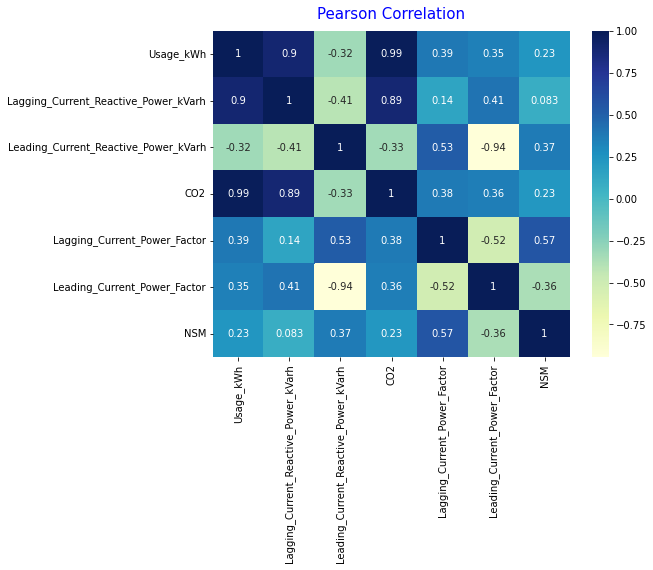

In [16]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [17]:
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


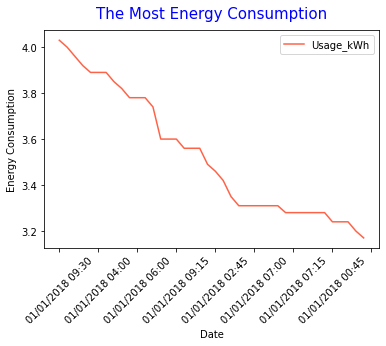

In [18]:
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

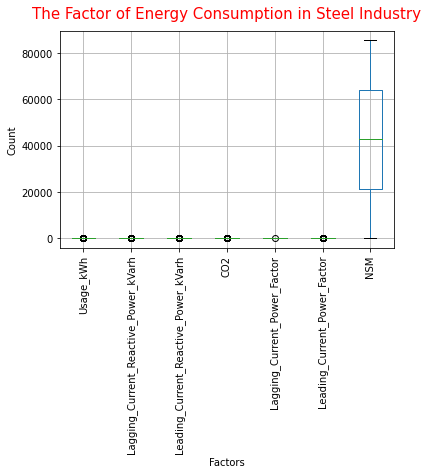

In [19]:
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

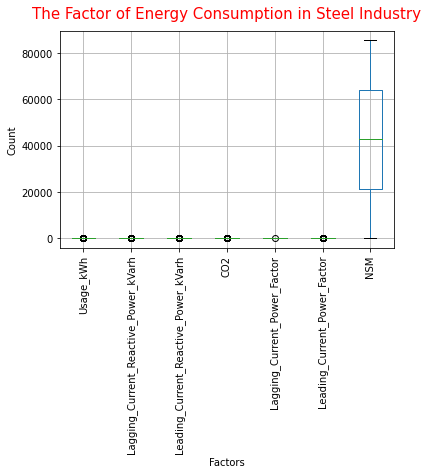

In [20]:

chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

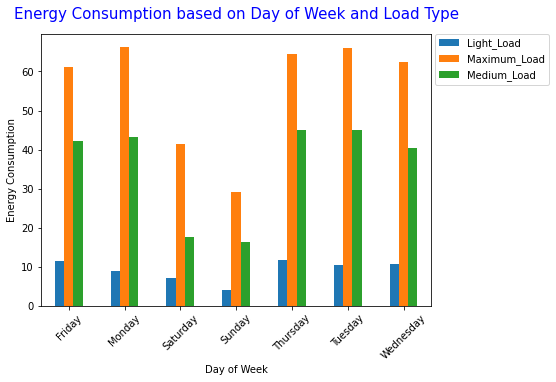

In [22]:
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()


plt.rcParams['figure.figsize'] = (7,5)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()


chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

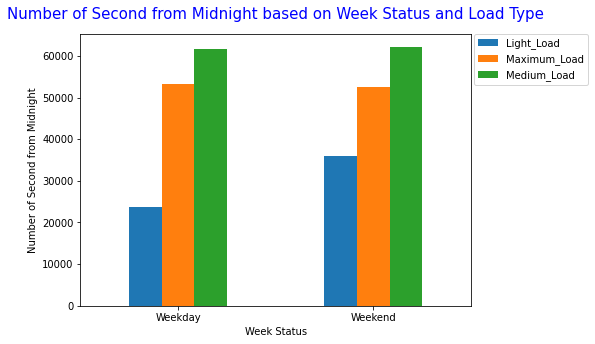

In [23]:

chart = df.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

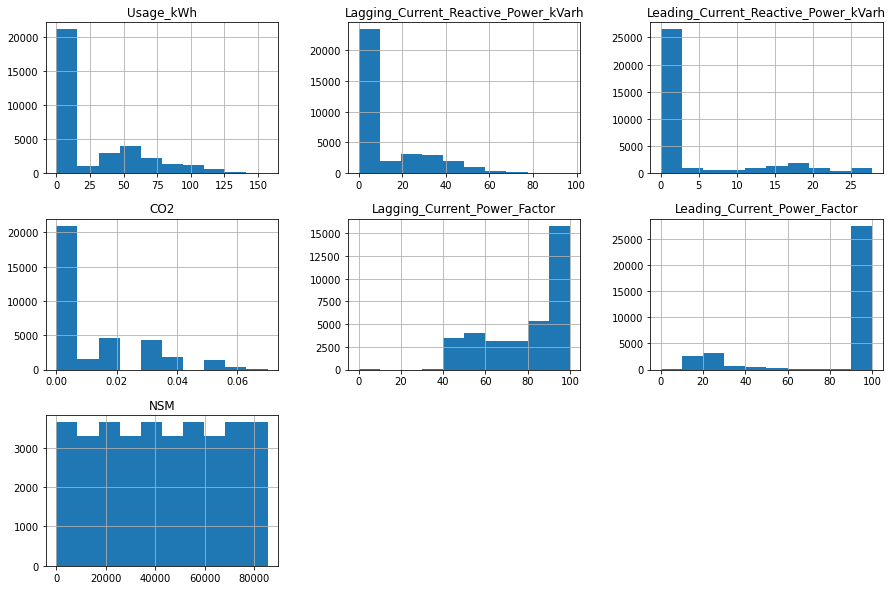

In [24]:

chart = df.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Number of Second from Midnight based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()


df.hist(figsize = (15,10))
plt.show()


df = df.set_index('date')

#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

In [25]:

X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)


ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)


lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)


y_pred = lr.predict(X_test)
print(y_pred)


print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

(24528, 15)
(24528,)
(10512, 15)
(10512,)
CPU times: user 37.7 ms, sys: 8.01 ms, total: 45.7 ms
Wall time: 70.9 ms
CPU times: user 33.1 ms, sys: 4.54 ms, total: 37.6 ms
Wall time: 42.6 ms
CPU times: user 95.3 ms, sys: 36.5 ms, total: 132 ms
Wall time: 125 ms
[  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]
Mean Absolute Error :  2.5519176087386315
Mean Squared Error :  17.76938905135436
Root Mean Squared Error :  4.215375315598169


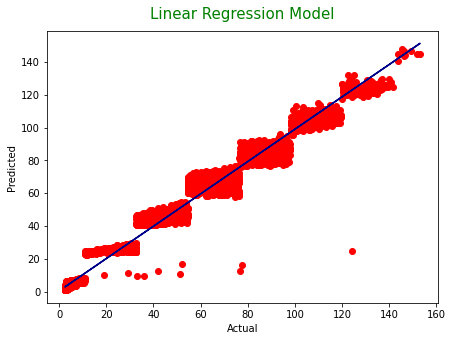

In [26]:
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()